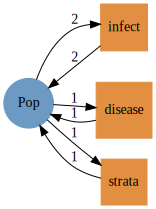

In [1]:
using AlgebraicPetri, AlgebraicPetri.TypedPetri
using Catlab.CategoricalAlgebra

const infectious_ontology = LabelledPetriNet(
  [:Pop],
  :infect=>((:Pop, :Pop)=>(:Pop, :Pop)),
  :disease=>(:Pop=>:Pop),
  :strata=>(:Pop=>:Pop)
)

Graph(infectious_ontology)

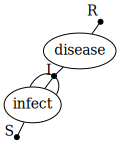

In [2]:
using Catlab.Programs, Catlab.Graphics

sir_uwd = @relation () where (S::Pop, I::Pop, R::Pop) begin
  infect(S,I,I,I) # inf
  disease(I,R) # rem
end

typed_sir = oapply_typed(infectious_ontology, sir_uwd, [:inf, :rem])

to_graphviz(sir_uwd, box_labels=:name, junction_labels=:variable)

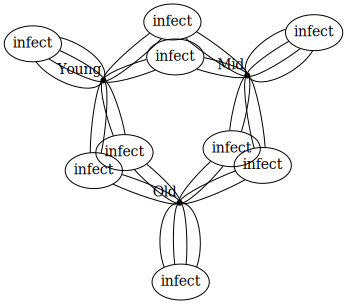

In [3]:
age_uwd = @relation () where (Young::Pop, Mid::Pop, Old::Pop) begin
  infect(Young, Young, Young, Young)
  infect(Young, Mid, Young, Mid)
  infect(Young, Old, Young, Old)
  infect(Mid, Young, Mid, Young)
  infect(Mid, Mid, Mid, Mid)
  infect(Mid, Old, Mid, Old)
  infect(Old, Young, Old, Young)
  infect(Old, Mid, Old, Mid)
  infect(Old, Old, Old, Old)
end

typed_age = oapply_typed(infectious_ontology, age_uwd,
  [:YY, :YM, :YO, :MY, :MM, :MO, :OY, :OM, :OO])

to_graphviz(age_uwd, box_labels=:name, junction_labels=:variable,
            edge_attrs=Dict(:len => "1"))

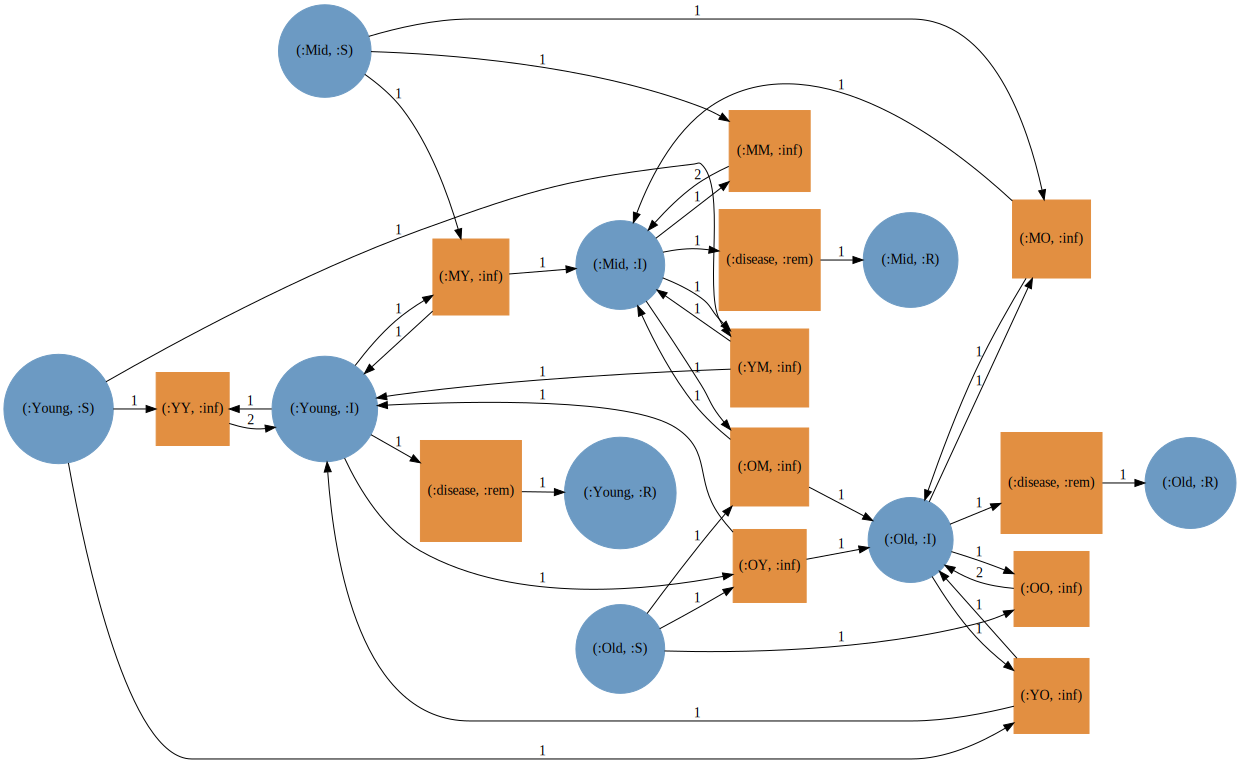

In [4]:
typed_age_aug = add_reflexives(
  typed_age,
  [[:disease], [:disease], [:disease]],
  infectious_ontology
)

typed_sir_aug = add_reflexives(
  typed_sir,
  [[:strata], [:strata], [:strata]],
  infectious_ontology
)

stratified = typed_product(typed_age_aug, typed_sir_aug)

Graph(dom(stratified))

In [5]:
write_json_acset(dom(stratified), "scenario1_stratified_model.json")

1198